In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

11493376/11490434 [==============================] - 0s 0us/step


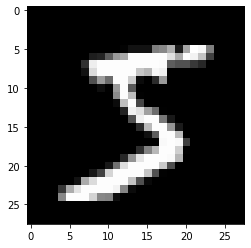

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [ ]:
LATENT_SIZE = 2
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    Dropout(0.5),
    Dense(256),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(64),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="linear"),
])

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(256),
    Dropout(0.5),
    Dense(512),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

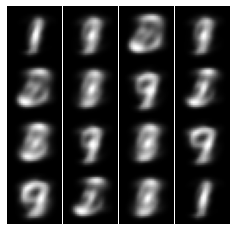

----------- EPOCH 44 -----------
938/938 [==============================] - 28s 30ms/step - loss: 0.2325


In [ ]:
EPOCHS = 45
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)

In [ ]:
print("the error for the first picture is : ", np.sum(np.abs(model.predict(x_train[0].reshape(1,28,28)).reshape(28,28) - x_train[0])))

the error for the first picture is :  105.21067425239511


In [ ]:
from tqdm import tqdm
dots = []
for each in tqdm(x_train):
  q = encoder(each.reshape(1,28,28))
  dots.append(q.numpy())

 91%|█████████▏| 54811/60000 [02:23<00:13, 389.89it/s]

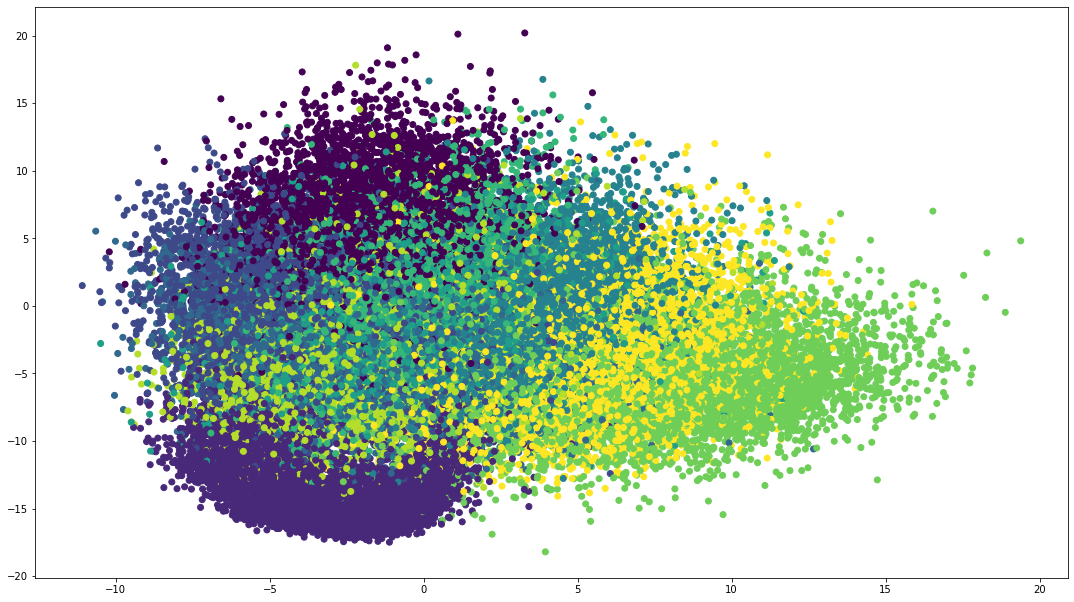

In [ ]:
dots = np.array(dots).reshape(-1,2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.scatter(dots[:,0], dots[:,1],c = y_train)
plt.show()

  0%|          | 2/60000 [00:00<58:31, 17.09it/s]

final error


100%|██████████| 60000/60000 [45:58<00:00, 21.75it/s]


 so the final error is :  5921644.50551391
